In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
x_train = x_train.reshape((-1, 28, 28, 1)).astype('float32') / 255.0
x_test = x_test.reshape((-1, 28, 28, 1)).astype('float32') / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


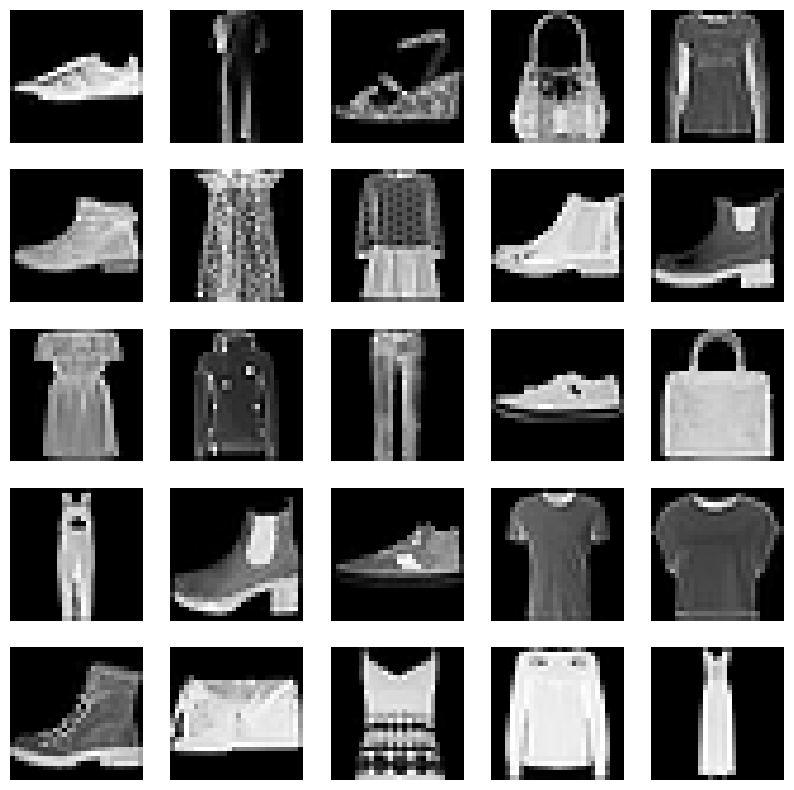

In [ ]:
# Visualize sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
plt.show()

In [ ]:
# Build the model
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model



In [ ]:
model = create_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_val, y_val), callbacks=[early_stopping])

Epoch 1/50
750/750 [==============================] - 55s 68ms/step - loss: 0.6905 - accuracy: 0.7486 - val_loss: 0.3922 - val_accuracy: 0.8593
Epoch 2/50
750/750 [==============================] - 40s 53ms/step - loss: 0.4244 - accuracy: 0.8490 - val_loss: 0.3302 - val_accuracy: 0.8772
Epoch 3/50
750/750 [==============================] - 41s 55ms/step - loss: 0.3617 - accuracy: 0.8714 - val_loss: 0.3049 - val_accuracy: 0.8872
Epoch 4/50
750/750 [==============================] - 40s 53ms/step - loss: 0.3253 - accuracy: 0.8827 - val_loss: 0.2871 - val_accuracy: 0.8940
Epoch 5/50
750/750 [==============================] - 41s 54ms/step - loss: 0.2971 - accuracy: 0.8933 - val_loss: 0.2888 - val_accuracy: 0.8936
Epoch 6/50
750/750 [==============================] - 39s 53ms/step - loss: 0.2749 - accuracy: 0.9025 - val_loss: 0.2646 - val_accuracy: 0.9049
Epoch 7/50
750/750 [==============================] - 40s 53ms/step - loss: 0.2595 - accuracy: 0.9078 - val_loss: 0.2554 - val_accuracy:

In [ ]:
# Evaluate accuracy
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)

313/313 [==============================] - 4s 12ms/step - loss: 0.2589 - accuracy: 0.9062
Test Accuracy: 0.9061999917030334


In [ ]:
# Make predictions
predictions = model.predict(x_test)

313/313 [==============================] - 2s 8ms/step


In [ ]:
# Verify predictions
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

In [ ]:
# Print a sample of predicted labels and true labels
print("Predicted labels:", predicted_labels[:10])
print("True labels:", true_labels[:10])

Predicted labels: [9 2 1 1 6 1 4 6 5 7]
True labels: [9 2 1 1 6 1 4 6 5 7]


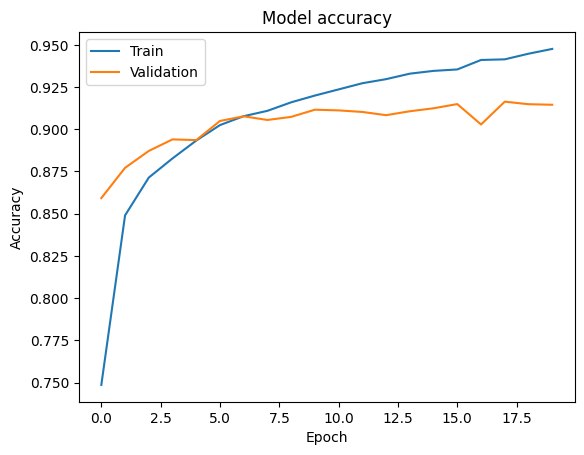

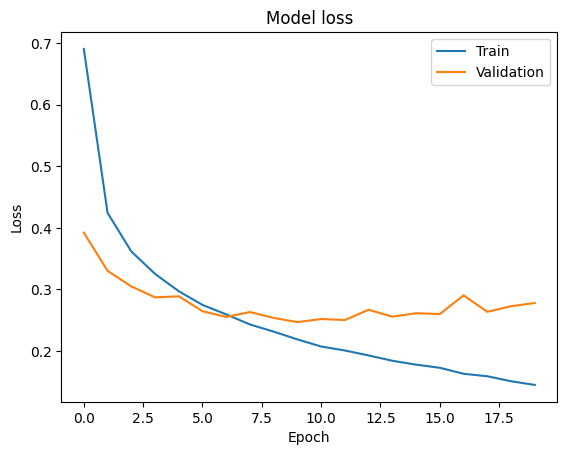

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()

# After training your model, you can call this function passing the history object.
plot_history(history)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 256)               4